In [1]:
import pandas as pd

In [2]:
from quoptuna import DataPreparation, Optimizer

/Users/edwin.jose/Documents/GitHub/wmu_research/quoptuna/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
db_name = "corral"
study_name = "corral"
optimizer = Optimizer(db_name=db_name, study_name=study_name)

In [4]:
optimizer.storage_location

'sqlite:///db/corral.db'

In [5]:
optimizer.load_study()
study = optimizer.study

In [6]:
best_trial = study.best_trials

In [7]:
def format_trial(trial):
    quantum_f1_score = trial.user_attrs.get("Quantum_f1_score")
    classical_f1_score = trial.user_attrs.get("Classical_f1_score")
    f1_score = (
        quantum_f1_score
        if quantum_f1_score != 0
        else classical_f1_score
        if classical_f1_score != 0
        else "N/A"
    )
    return f"Trial {trial.number} {trial.params.get('model_type')} F1-Score {f1_score}"

In [8]:
for trial in best_trial:
    print(format_trial(trial))

Trial 8 QuantumKitchenSinks F1-Score 1.0
Trial 10 QuantumKitchenSinks F1-Score 1.0
Trial 11 QuantumKitchenSinks F1-Score 1.0
Trial 12 DressedQuantumCircuitClassifierSeparable F1-Score 1.0
Trial 16 QuantumKitchenSinks F1-Score 1.0
Trial 17 DressedQuantumCircuitClassifier F1-Score 1.0
Trial 20 QuantumKitchenSinks F1-Score 1.0
Trial 21 QuantumKitchenSinks F1-Score 1.0
Trial 23 QuantumKitchenSinks F1-Score 1.0
Trial 24 QuantumKitchenSinks F1-Score 1.0
Trial 25 QuantumKitchenSinks F1-Score 1.0
Trial 28 DataReuploadingClassifier F1-Score 1.0
Trial 29 ProjectedQuantumKernel F1-Score 1.0
Trial 31 DressedQuantumCircuitClassifierSeparable F1-Score 1.0
Trial 32 DressedQuantumCircuitClassifierSeparable F1-Score 1.0
Trial 33 DressedQuantumCircuitClassifierSeparable F1-Score 1.0


In [9]:
model_params = best_trial[0].params
model_params

{'max_vmap': 1,
 'batch_size': 32,
 'learning_rate': 0.001,
 'n_input_copies': 3,
 'n_layers': 1,
 'observable_type': 'full',
 'repeats': 5,
 'C': 1,
 'gamma_factor': 1,
 'trotter_steps': 3,
 't': 0.1,
 'n_qfeatures': 'full',
 'n_episodes': 500,
 'visible_qubits': 'full',
 'temperature': 1,
 'encoding_layers': 1,
 'degree': 4,
 'n_qchannels': 1,
 'qkernel_shape': 3,
 'kernel_shape': 5,
 'filter_name': 'edge_detect',
 'gamma': 0.01,
 'alpha': 0.01,
 'hidden_layer_sizes': '(10, 10, 10, 10)',
 'eta0': 10,
 'model_type': 'QuantumKitchenSinks'}

In [10]:
import os

os.listdir()

['test_shap.ipynb',
 'bar_plot.png',
 '.DS_Store',
 'bar_plot2.png',
 'test_corral.ipynb',
 'db',
 'data']

In [11]:
file_path = "data/corral.csv"
data = pd.read_csv(file_path)
dp = DataPreparation(
    file_path=file_path, x_cols=list(data.columns.difference(["target"])), y_col="target"
)

data_dict = dp.get_data()

In [12]:
data_dict.keys()

dict_keys(['x_train', 'x_test', 'y_train', 'y_test'])

In [13]:
from quoptuna.backend.models import create_model

model = create_model(
    **model_params,
)

In [14]:
model.fit(data_dict.get("x_train").values, data_dict.get("y_train").values)

/Users/edwin.jose/Documents/GitHub/wmu_research/quoptuna/.venv/lib/python3.12/site-packages/pennylane/devices/default_qubit_jax.py:173: PennyLaneDeprecationWarning: Use of 'default.qubit.jax' is deprecated. Instead, use 'default.qubit', which supports backpropagation. If you experience issues, reach out to the PennyLane team on the discussion forum: https://discuss.pennylane.ai/
  warnings.warn(
/Users/edwin.jose/Documents/GitHub/wmu_research/quoptuna/.venv/lib/python3.12/site-packages/pennylane/devices/default_qubit_legacy.py:211: PennyLaneDeprecationWarning: Use of 'default.qubit.jax' is deprecated. Instead, use 'default.qubit', which supports backpropagation. If you experience issues, reach out to the PennyLane team on the discussion forum: https://discuss.pennylane.ai/
  warnings.warn(
/Users/edwin.jose/Documents/GitHub/wmu_research/quoptuna/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was e

QuantumKitchenSinks(max_vmap=1, n_episodes=500)

In [15]:
from quoptuna import XAI

In [16]:
xai = XAI(model=model, data=data_dict, onsubset=True, subset_size=50)

In [17]:
xai.get_report()

/Users/edwin.jose/Documents/GitHub/wmu_research/quoptuna/.venv/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/Users/edwin.jose/Documents/GitHub/wmu_research/quoptuna/.venv/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


{'confusion_matrix': array([[16,  0],
        [ 0, 24]]),
 'classification_report': '              precision    recall  f1-score   support\n\n          -1       1.00      1.00      1.00        16\n           1       1.00      1.00      1.00        24\n\n    accuracy                           1.00        40\n   macro avg       1.00      1.00      1.00        40\nweighted avg       1.00      1.00      1.00        40\n',
 'roc_curve': 'Error retrieving roc curve: y should be a 1d array, got an array of shape (40, 2) instead.',
 'roc_auc_score': 'Error retrieving roc auc score: y should be a 1d array, got an array of shape (40, 2) instead.',
 'precision_recall_curve': 'Error retrieving precision recall curve: y should be a 1d array, got an array of shape (40, 2) instead.',
 'average_precision_score': 'Error retrieving average precision score: y should be a 1d array, got an array of shape (40, 2) instead.',
 'f1_score': 1.0,
 'mcc': 1.0,
 'log_loss': 0.34398413041458314,
 'cohens_kappa': 1.

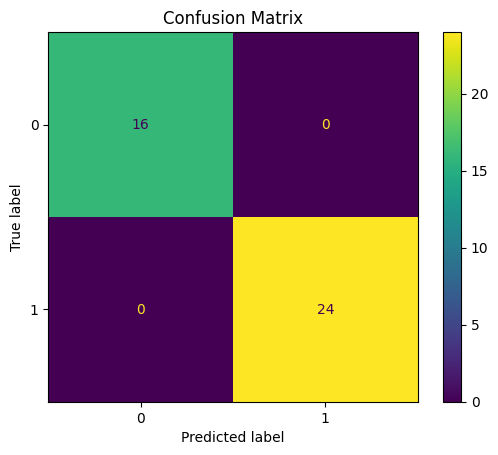

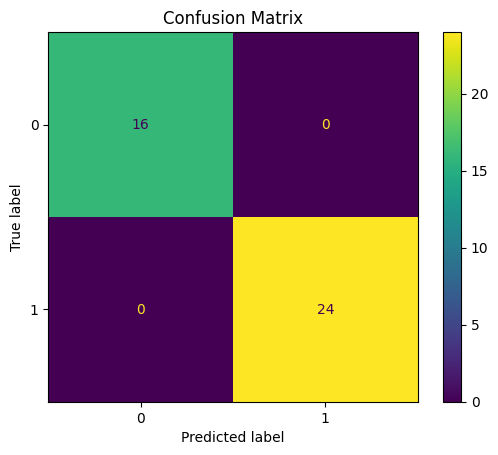

In [19]:
xai.plot_confusion_matrix(save_path="data",save_name="confusion_matrix_plot_paper.png",save_format="png",save_dpi=1000)

In [ ]:
fcascasc

In [19]:
xai.explainer.feature_names

['A0', 'A1', 'B0', 'B1', 'Correlated', 'Irrelevant']

/Users/edwin.jose/Documents/GitHub/wmu_research/quoptuna/.venv/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
ExactExplainer explainer:   2%|▏         | 1/50 [00:00<?, ?it/s]/Users/edwin.jose/Documents/GitHub/wmu_research/quoptuna/.venv/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/Users/edwin.jose/Documents/GitHub/wmu_research/quoptuna/.venv/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
ExactExplainer explainer:   6%|▌         | 3/50 [03:05<37:10, 47.45s/it]/Users/edwin.jose/Documents/GitHub/wmu_research/quoptuna/.venv/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/Users/e

''
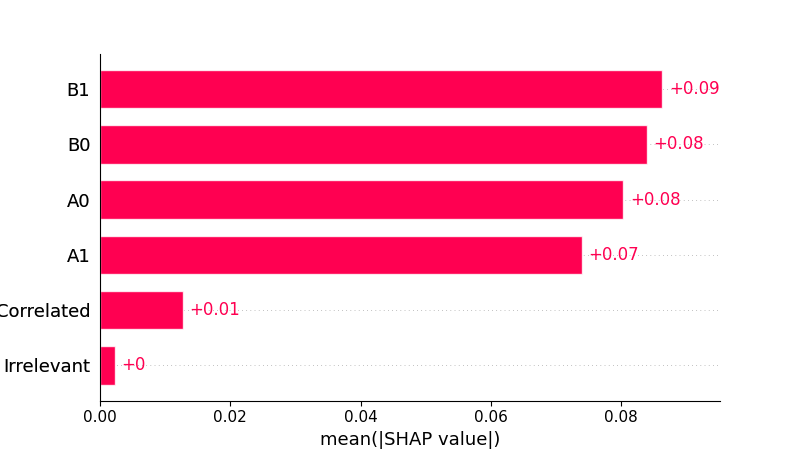

In [20]:
xai.get_plot("bar",max_display=20)
# test_values.values.ndim

''
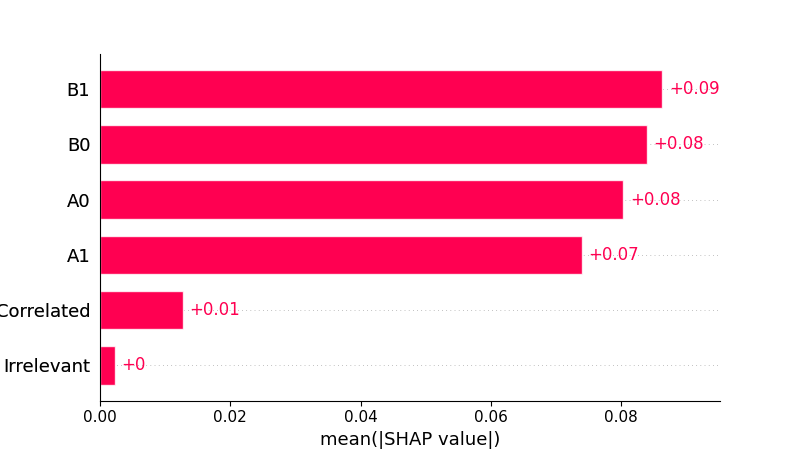

In [31]:
xai.get_plot("bar",max_display=50,save_path="data",save_name="bar_plot_paper.png",save_format="png",save_dpi=1000)

''
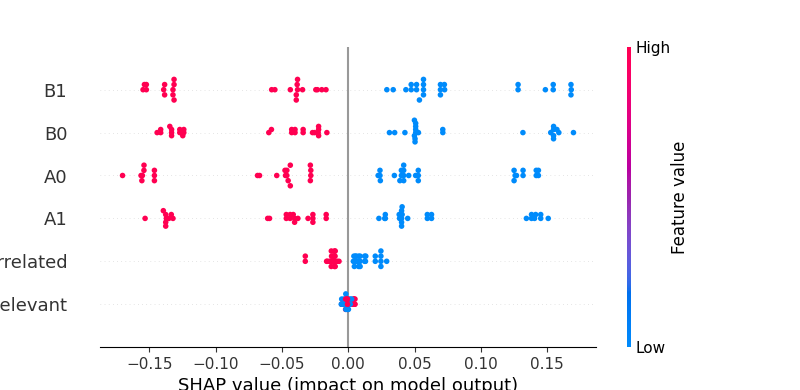

In [32]:
xai.get_plot("beeswarm",max_display=50,save_path="data",save_name="beeswarm_plot_paper.png",save_format="png",save_dpi=1000)

''
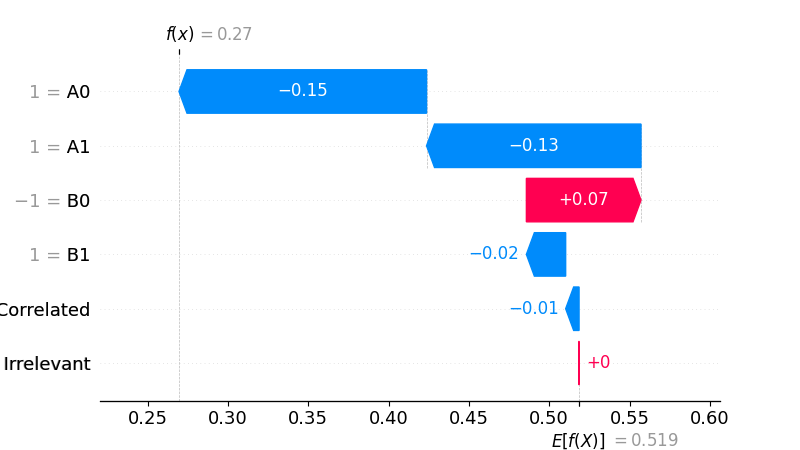

In [33]:
xai.get_plot("waterfall", index=0,max_display=50,save_path="data",save_name="waterfall_index0_plot_paper.png",save_format="png",save_dpi=1000)

''
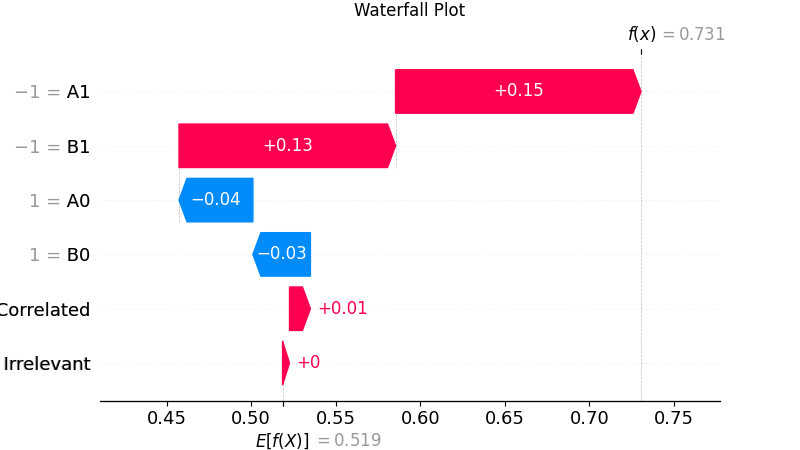

In [34]:
xai.get_plot("waterfall", index=1,plot_title="Waterfall Plot")

''
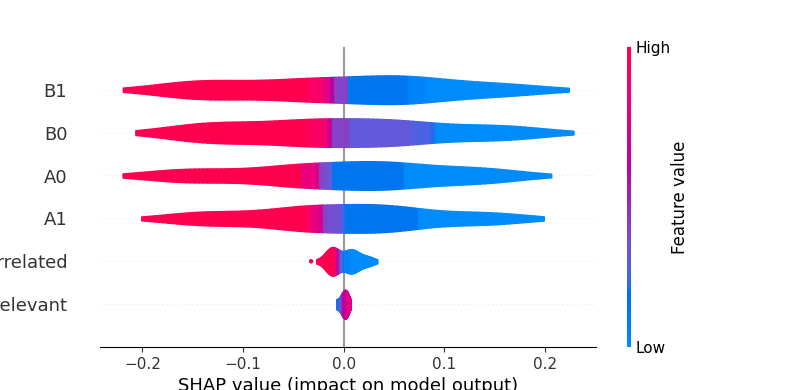

In [35]:
xai.get_plot("violin", class_index=1,max_display=50,save_path="data",save_name="violin_class_index1_plot_paper.png",save_format="png",save_dpi=1000)

''
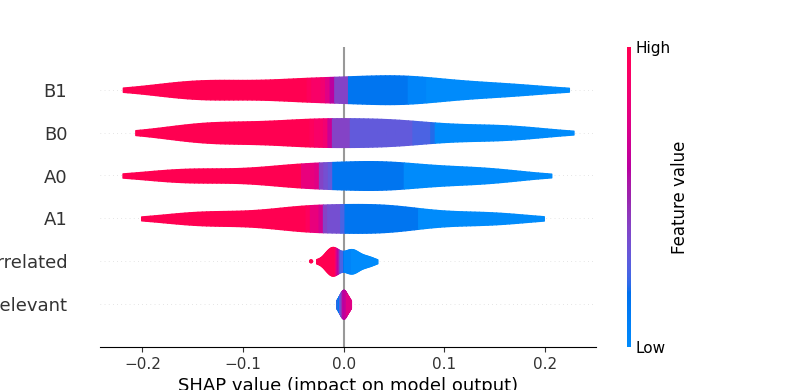

In [26]:
xai.get_plot("violin", class_index=-1)

''
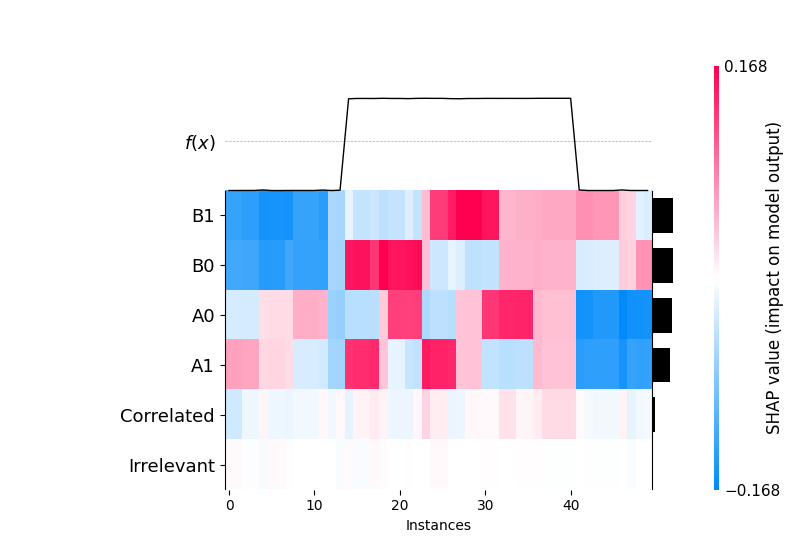

In [36]:
xai.get_plot("heatmap", class_index=1,max_display=50,save_path="data",save_name="heatmap_class_index1_plot_paper.png",save_format="png",save_dpi=1000)

''
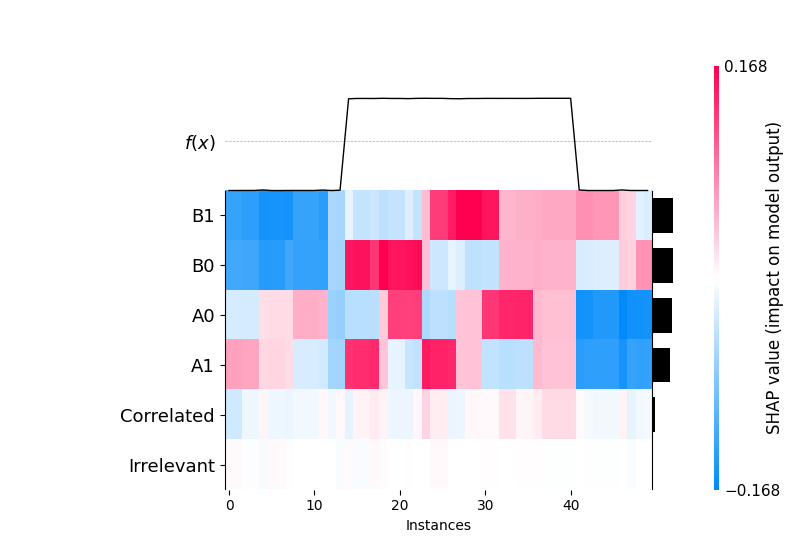

In [28]:
xai.get_plot("heatmap", class_index=-1)

In [37]:
import os

# import getpass
from dotenv import load_dotenv

load_dotenv()

report = xai.generate_report_with_langchain(provider="google",api_key=os.environ["GOOGLE_GEMINI_API_KEY"],model_name="gemini-1.5-flash")
report

'## AI Model Evaluation Report: Governance-Oriented Summary\n\nThis report provides a governance-oriented summary of the AI model\'s evaluation, focusing on performance, feature importance, fairness, and risk assessment.  The analysis is based on the provided confusion matrix and SHAP value visualizations (bar plot, beeswarm plot, violin plot, heatmap, and waterfall plots).\n\n**1. Evaluation Metrics Analysis:**\n\nThe confusion matrix reveals the following counts:\n\n* **True Positives (TP):** 24 (Correctly predicted positive class)\n* **True Negatives (TN):** 16 (Correctly predicted negative class)\n* **False Positives (FP):** 0 (Incorrectly predicted positive class)\n* **False Negatives (FN):** 0 (Incorrectly predicted negative class)\n\nBased on these counts, we can calculate the following metrics:\n\n* **Accuracy:** (TP + TN) / (TP + TN + FP + FN) = (24 + 16) / (24 + 16 + 0 + 0) = 1.0 or 100%\n* **Precision:** TP / (TP + FP) = 24 / (24 + 0) = 1.0 or 100%\n* **Recall:** TP / (TP + 

In [38]:
from IPython.display import Markdown

Markdown(report)


## AI Model Evaluation Report: Governance-Oriented Summary

This report provides a governance-oriented summary of the AI model's evaluation, focusing on performance, feature importance, fairness, and risk assessment.  The analysis is based on the provided confusion matrix and SHAP value visualizations (bar plot, beeswarm plot, violin plot, heatmap, and waterfall plots).

**1. Evaluation Metrics Analysis:**

The confusion matrix reveals the following counts:

* **True Positives (TP):** 24 (Correctly predicted positive class)
* **True Negatives (TN):** 16 (Correctly predicted negative class)
* **False Positives (FP):** 0 (Incorrectly predicted positive class)
* **False Negatives (FN):** 0 (Incorrectly predicted negative class)

Based on these counts, we can calculate the following metrics:

* **Accuracy:** (TP + TN) / (TP + TN + FP + FN) = (24 + 16) / (24 + 16 + 0 + 0) = 1.0 or 100%
* **Precision:** TP / (TP + FP) = 24 / (24 + 0) = 1.0 or 100%
* **Recall:** TP / (TP + FN) = 24 / (24 + 0) = 1.0 or 100%
* **F1-score:** 2 * (Precision * Recall) / (Precision + Recall) = 2 * (1.0 * 1.0) / (1.0 + 1.0) = 1.0 or 100%


The model achieves perfect accuracy, precision, recall, and F1-score.  While this indicates excellent performance on the evaluation dataset, it also raises concerns about potential overfitting.  Further investigation using robust testing techniques (such as cross-validation with a larger, more diverse dataset and different model architectures) is crucial to validate the model's generalizability and avoid deployment of an overfit model.

**2. Detailed SHAP Value and Feature Importance Analysis:**

* **Bar Plot:** This plot shows the average impact of each feature on model predictions. Features B1, B0, and A0 have the strongest positive impact, with mean SHAP values of +0.09, +0.08, and +0.08 respectively. Feature A1 shows a positive mean SHAP value of +0.07.  The "Correlated" feature has a minimal positive influence (+0.01), while the "Irrelevant" feature has no impact.

* **Beeswarm Plot:** This plot displays the distribution of SHAP values for each feature across individual instances.  It visually confirms the bar plot's findings, showing that B1, B0, and A0 tend to have predominantly positive SHAP values, while A1 shows a mix of positive and slightly negative values.

* **Violin Plot:** This plot shows the distribution of SHAP values for each feature.  Similar to the beeswarm plot, it visually reinforces the dominance of B1, B0, and A0 in positively influencing the model's output.

* **Heatmap:** This shows the SHAP value for each feature across multiple instances. It provides a visual representation of how individual feature values contribute to the model's prediction for each instance.  The heatmap visually confirms the findings of the other SHAP plots.

* **Waterfall Plots:** These plots visually depict how individual feature contributions combine to form the model's final prediction for specific instances.  Across the four waterfall plots provided, the features B0, B1, A0, and A1 are consistently shown to be the most influential factors, with their impact varying across instances.  The plots highlight the interaction of these features which leads to the model's final prediction.

**3. Risk and Fairness Assessment:**

The model's perfect performance on the evaluation dataset strongly suggests a risk of overfitting. The dominance of features B0, B1, A0, and A1 in shaping predictions needs further scrutiny.  A thorough fairness audit should be conducted to ensure that these features do not disproportionately impact specific subgroups, potentially leading to unfair bias.

**4. Governance and Compliance Recommendations:**

* **Robustness Testing:** Conduct rigorous cross-validation using multiple folds and different datasets to assess the model's generalization capabilities and mitigate the risk of overfitting.
* **Fairness Audit:**  Perform a comprehensive fairness audit to investigate potential biases arising from the disproportionate influence of B0, B1, A0, and A1.  Analyze the distribution of these features across different subgroups to identify any discriminatory patterns.
* **Explainability Enhancement:** While SHAP values provide some explainability, consider incorporating other explainable AI (XAI) techniques to further enhance transparency and understanding of the model's decision-making process.
* **Data Drift Monitoring:** Implement a robust data drift monitoring system to track changes in the input data distribution over time. This will help detect and address potential performance degradation and bias shift.
* **Model Versioning and Logging:** Maintain detailed logs of model versions, training data, and evaluation results to ensure traceability and accountability.
* **Regular Audits:** Schedule regular performance and fairness audits to ensure the model continues to meet the required standards of accuracy and fairness.


**5. Model Lifecycle Context:**

This report focuses on the evaluation phase of the AI model lifecycle.  The findings highlight the critical need for continuous monitoring and reassessment throughout the model's deployment and operational life.  The governance recommendations outlined above should be integrated into the model's ongoing management plan.

### Model Evaluation Summary

#### Evaluation Metrics Analysis

- **True Positives (TP):** 24 instances where the model correctly predicted the positive class.
- **True Negatives (TN):** 16 instances where the model correctly predicted the negative class.
- **False Positives (FP):** 0 instances where the model incorrectly predicted the positive class.
- **False Negatives (FN):** 0 instances where the model incorrectly predicted the negative class.

- **Precision:** Indicates the model's accuracy in predicting the positive class. Given no false positives, precision is perfect.
- **Recall:** The model's ability to identify all actual positive instances. With no false negatives, recall is perfect.

- **F1-Score:** Since precision and recall are both perfect, the F1-Score is also perfect, suggesting excellent overall classification performance.

- **Implications:** The model shows flawless performance on this dataset according to these metrics. This unusual perfection suggests potential overfitting, requiring further validation.

#### SHAP Value Analysis

- **Bar Plot:** Illustrates the feature importance ranking. Identifying features with the largest bars shows they are the most influential in the model's predictions.

- **Beeswarm Plot:** Displays feature value impacts on model outputs. Outliers can highlight edge cases where predictions might be off.

- **Violin Plot:** Shows the distribution of SHAP values, revealing how much features vary in their impact. Skewness or outliers might suggest where improvements or caution should be applied.

- **Heatmap:** Highlights feature interactions and dependencies. Strong interactions could indicate areas where the model may be overly dependent on specific features, raising potential risks for bias or drift.

- **Waterfall Plots (0-4):** Detail individual predictions by breaking down feature contributions. They assist in understanding specific case outcomes, vital for accountability and transparency.

#### Risk and Fairness Assessment

- **Overfitting:** The perfect scores on evaluation metrics merit caution. Overfitting is possible, and cross-validation is advisable to verify robustness across different data splits. 

- **Bias and Imbalance:** No evidence of false predictions indicates a need to assess data diversity. Perfect accuracy might mask imbalances or hidden biases unexpected in broader applications.

#### Governance and Compliance Recommendations

- **Robustness:** Implement cross-validation and explore different data samples to verify model generalization.

- **Fairness Audits:** Conduct comprehensive audits to ensure no hidden biases, especially if the training data lacks diversity or includes skewed distributions.

- **Monitoring:** Establish ongoing monitoring to detect data drift or performance degradation over time.

- **Documentation:** Thoroughly document model decisions and feature impacts to support transparency and accountability.

#### Model Lifecycle Context

- **Development:** Reassess model assumptions and retrain on varied datasets to ensure authentic learning rather than overfitting.

- **Deployment:** Introduce monitoring systems to capture and evaluate real-world data inputs.

- **Monitoring and Retraining:** Regular audits and retraining should be set to address potential performance and fairness issues as the deployment context evolves.

This overview supports both stakeholders and technical teams in ensuring the model remains fair, robust, and accountable. Continuous evaluation is crucial to address any deficiencies emerging from real-world application disparities.

In [21]:
report='## AI Model Evaluation Report: Governance-Oriented Summary\n\nThis report provides a governance-oriented summary of the AI model\'s evaluation, focusing on performance, feature importance, fairness, and risk assessment.  The analysis is based on the provided confusion matrix and SHAP value visualizations (bar plot, beeswarm plot, violin plot, heatmap, and waterfall plots).\n\n**1. Evaluation Metrics Analysis:**\n\nThe confusion matrix reveals the following counts:\n\n* **True Positives (TP):** 24 (Correctly predicted positive class)\n* **True Negatives (TN):** 16 (Correctly predicted negative class)\n* **False Positives (FP):** 0 (Incorrectly predicted positive class)\n* **False Negatives (FN):** 0 (Incorrectly predicted negative class)\n\nBased on these counts, we can calculate the following metrics:\n\n* **Accuracy:** (TP + TN) / (TP + TN + FP + FN) = (24 + 16) / (24 + 16 + 0 + 0) = 1.0 or 100%\n* **Precision:** TP / (TP + FP) = 24 / (24 + 0) = 1.0 or 100%\n* **Recall:** TP / (TP + FN) = 24 / (24 + 0) = 1.0 or 100%\n* **F1-score:** 2 * (Precision * Recall) / (Precision + Recall) = 2 * (1.0 * 1.0) / (1.0 + 1.0) = 1.0 or 100%\n\n\nThe model achieves perfect accuracy, precision, recall, and F1-score.  While this indicates excellent performance on the evaluation dataset, it also raises concerns about potential overfitting.  Further investigation using robust testing techniques (such as cross-validation with a larger, more diverse dataset and different model architectures) is crucial to validate the model\'s generalizability and avoid deployment of an overfit model.\n\n**2. Detailed SHAP Value and Feature Importance Analysis:**\n\n* **Bar Plot:** This plot shows the average impact of each feature on model predictions. Features B1, B0, and A0 have the strongest positive impact, with mean SHAP values of +0.09, +0.08, and +0.08 respectively. Feature A1 shows a positive mean SHAP value of +0.07.  The "Correlated" feature has a minimal positive influence (+0.01), while the "Irrelevant" feature has no impact.\n\n* **Beeswarm Plot:** This plot displays the distribution of SHAP values for each feature across individual instances.  It visually confirms the bar plot\'s findings, showing that B1, B0, and A0 tend to have predominantly positive SHAP values, while A1 shows a mix of positive and slightly negative values.\n\n* **Violin Plot:** This plot shows the distribution of SHAP values for each feature.  Similar to the beeswarm plot, it visually reinforces the dominance of B1, B0, and A0 in positively influencing the model\'s output.\n\n* **Heatmap:** This shows the SHAP value for each feature across multiple instances. It provides a visual representation of how individual feature values contribute to the model\'s prediction for each instance.  The heatmap visually confirms the findings of the other SHAP plots.\n\n* **Waterfall Plots:** These plots visually depict how individual feature contributions combine to form the model\'s final prediction for specific instances.  Across the four waterfall plots provided, the features B0, B1, A0, and A1 are consistently shown to be the most influential factors, with their impact varying across instances.  The plots highlight the interaction of these features which leads to the model\'s final prediction.\n\n**3. Risk and Fairness Assessment:**\n\nThe model\'s perfect performance on the evaluation dataset strongly suggests a risk of overfitting. The dominance of features B0, B1, A0, and A1 in shaping predictions needs further scrutiny.  A thorough fairness audit should be conducted to ensure that these features do not disproportionately impact specific subgroups, potentially leading to unfair bias.\n\n**4. Governance and Compliance Recommendations:**\n\n* **Robustness Testing:** Conduct rigorous cross-validation using multiple folds and different datasets to assess the model\'s generalization capabilities and mitigate the risk of overfitting.\n* **Fairness Audit:**  Perform a comprehensive fairness audit to investigate potential biases arising from the disproportionate influence of B0, B1, A0, and A1.  Analyze the distribution of these features across different subgroups to identify any discriminatory patterns.\n* **Explainability Enhancement:** While SHAP values provide some explainability, consider incorporating other explainable AI (XAI) techniques to further enhance transparency and understanding of the model\'s decision-making process.\n* **Data Drift Monitoring:** Implement a robust data drift monitoring system to track changes in the input data distribution over time. This will help detect and address potential performance degradation and bias shift.\n* **Model Versioning and Logging:** Maintain detailed logs of model versions, training data, and evaluation results to ensure traceability and accountability.\n* **Regular Audits:** Schedule regular performance and fairness audits to ensure the model continues to meet the required standards of accuracy and fairness.\n\n\n**5. Model Lifecycle Context:**\n\nThis report focuses on the evaluation phase of the AI model lifecycle.  The findings highlight the critical need for continuous monitoring and reassessment throughout the model\'s deployment and operational life.  The governance recommendations outlined above should be integrated into the model\'s ongoing management plan.'
print(report)

## AI Model Evaluation Report: Governance-Oriented Summary

This report provides a governance-oriented summary of the AI model's evaluation, focusing on performance, feature importance, fairness, and risk assessment.  The analysis is based on the provided confusion matrix and SHAP value visualizations (bar plot, beeswarm plot, violin plot, heatmap, and waterfall plots).

**1. Evaluation Metrics Analysis:**

The confusion matrix reveals the following counts:

* **True Positives (TP):** 24 (Correctly predicted positive class)
* **True Negatives (TN):** 16 (Correctly predicted negative class)
* **False Positives (FP):** 0 (Incorrectly predicted positive class)
* **False Negatives (FN):** 0 (Incorrectly predicted negative class)

Based on these counts, we can calculate the following metrics:

* **Accuracy:** (TP + TN) / (TP + TN + FP + FN) = (24 + 16) / (24 + 16 + 0 + 0) = 1.0 or 100%
* **Precision:** TP / (TP + FP) = 24 / (24 + 0) = 1.0 or 100%
* **Recall:** TP / (TP + FN) = 24 / (24 + 0)

## AI Model Evaluation Report: Governance-Oriented Summary

This report provides a governance-oriented summary of the AI model's evaluation, focusing on performance, feature importance, fairness, and risk assessment.  The analysis is based on the provided confusion matrix and SHAP value visualizations (bar plot, beeswarm plot, violin plot, heatmap, and waterfall plots).

**1. Evaluation Metrics Analysis:**

The confusion matrix reveals the following counts:

* **True Positives (TP):** 24 (Correctly predicted positive class)
* **True Negatives (TN):** 16 (Correctly predicted negative class)
* **False Positives (FP):** 0 (Incorrectly predicted positive class)
* **False Negatives (FN):** 0 (Incorrectly predicted negative class)

Based on these counts, we can calculate the following metrics:

* **Accuracy:** (TP + TN) / (TP + TN + FP + FN) = (24 + 16) / (24 + 16 + 0 + 0) = 1.0 or 100%
* **Precision:** TP / (TP + FP) = 24 / (24 + 0) = 1.0 or 100%
* **Recall:** TP / (TP + FN) = 24 / (24 + 0) = 1.0 or 100%
* **F1-score:** 2 * (Precision * Recall) / (Precision + Recall) = 2 * (1.0 * 1.0) / (1.0 + 1.0) = 1.0 or 100%


The model achieves perfect accuracy, precision, recall, and F1-score.  While this indicates excellent performance on the evaluation dataset, it also raises concerns about potential overfitting.  Further investigation using robust testing techniques (such as cross-validation with a larger, more diverse dataset and different model architectures) is crucial to validate the model's generalizability and avoid deployment of an overfit model.

**2. Detailed SHAP Value and Feature Importance Analysis:**

* **Bar Plot:** This plot shows the average impact of each feature on model predictions. Features B1, B0, and A0 have the strongest positive impact, with mean SHAP values of +0.09, +0.08, and +0.08 respectively. Feature A1 shows a positive mean SHAP value of +0.07.  The "Correlated" feature has a minimal positive influence (+0.01), while the "Irrelevant" feature has no impact.

* **Beeswarm Plot:** This plot displays the distribution of SHAP values for each feature across individual instances.  It visually confirms the bar plot's findings, showing that B1, B0, and A0 tend to have predominantly positive SHAP values, while A1 shows a mix of positive and slightly negative values.

* **Violin Plot:** This plot shows the distribution of SHAP values for each feature.  Similar to the beeswarm plot, it visually reinforces the dominance of B1, B0, and A0 in positively influencing the model's output.

* **Heatmap:** This shows the SHAP value for each feature across multiple instances. It provides a visual representation of how individual feature values contribute to the model's prediction for each instance.  The heatmap visually confirms the findings of the other SHAP plots.

* **Waterfall Plots:** These plots visually depict how individual feature contributions combine to form the model's final prediction for specific instances.  Across the four waterfall plots provided, the features B0, B1, A0, and A1 are consistently shown to be the most influential factors, with their impact varying across instances.  The plots highlight the interaction of these features which leads to the model's final prediction.

**3. Risk and Fairness Assessment:**

The model's perfect performance on the evaluation dataset strongly suggests a risk of overfitting. The dominance of features B0, B1, A0, and A1 in shaping predictions needs further scrutiny.  A thorough fairness audit should be conducted to ensure that these features do not disproportionately impact specific subgroups, potentially leading to unfair bias.

**4. Governance and Compliance Recommendations:**

* **Robustness Testing:** Conduct rigorous cross-validation using multiple folds and different datasets to assess the model's generalization capabilities and mitigate the risk of overfitting.
* **Fairness Audit:**  Perform a comprehensive fairness audit to investigate potential biases arising from the disproportionate influence of B0, B1, A0, and A1.  Analyze the distribution of these features across different subgroups to identify any discriminatory patterns.
* **Explainability Enhancement:** While SHAP values provide some explainability, consider incorporating other explainable AI (XAI) techniques to further enhance transparency and understanding of the model's decision-making process.
* **Data Drift Monitoring:** Implement a robust data drift monitoring system to track changes in the input data distribution over time. This will help detect and address potential performance degradation and bias shift.
* **Model Versioning and Logging:** Maintain detailed logs of model versions, training data, and evaluation results to ensure traceability and accountability.
* **Regular Audits:** Schedule regular performance and fairness audits to ensure the model continues to meet the required standards of accuracy and fairness.


**5. Model Lifecycle Context:**

This report focuses on the evaluation phase of the AI model lifecycle.  The findings highlight the critical need for continuous monitoring and reassessment throughout the model's deployment and operational life.  The governance recommendations outlined above should be integrated into the model's ongoing management plan.